In [13]:
# Block 1: Imports & Config
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# --- File Paths ---
frame1_path = r"..\000002_10.png"
frame2_path = r"..\000002_11.png"

# --- Output Config ---
output_dir = Path("./outputs_q1")
output_dir.mkdir(parents=True, exist_ok=True)
arrow_step = 16 # Subsampling for arrow visualization

# --- Helper Function ---
def imshow(ax, img, title="", cmap=None):
    """Helper function to display images with matplotlib."""
    ax.imshow(img if cmap is None else img, cmap=cmap)
    ax.set_title(title); ax.axis("off")

print("Block 1: Imports and configuration loaded.")

Block 1: Imports and configuration loaded.


Block 2: Frames loaded successfully: 1242x375


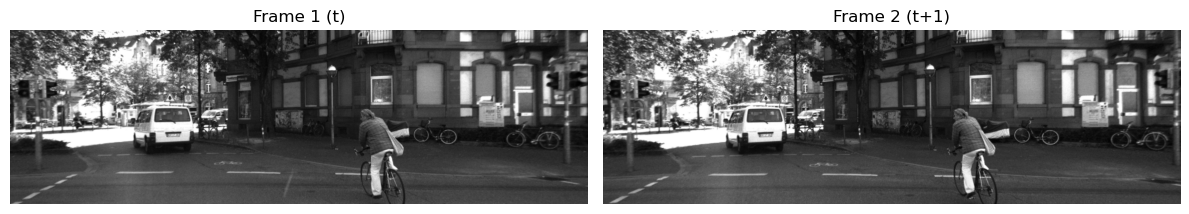

In [14]:
# Block 2: Load Grayscale Frames
frame1 = cv2.imread(frame1_path, cv2.IMREAD_GRAYSCALE)
frame2 = cv2.imread(frame2_path, cv2.IMREAD_GRAYSCALE)

if frame1 is None or frame2 is None:
    print(f"Error: Could not load images from paths:")
    print(f"Frame 1: {frame1_path}")
    print(f"Frame 2: {frame2_path}")
else:
    H, W = frame1.shape
    print(f"Block 2: Frames loaded successfully: {W}x{H}")

    # Display the loaded images
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    imshow(axs[0], frame1, "Frame 1 (t)", cmap="gray")
    imshow(axs[1], frame2, "Frame 2 (t+1)", cmap="gray")
    plt.tight_layout()
    plt.show()

In [15]:
# Block 3: Compute Dense Optical Flow (Farneback)
print("Block 3: Computing Farneback optical flow...")
flow = cv2.calcOpticalFlowFarneback(
    prev=frame1,
    next=frame2,
    flow=None,
    pyr_scale=0.5,  # Pyramidal scaling
    levels=3,       # Number of pyramid levels
    winsize=15,     # Averaging window size
    iterations=3,   # Iterations at each pyramid level
    poly_n=5,       # Size of pixel neighborhood
    poly_sigma=1.2, # Std dev for Gaussian smoothing
    flags=0
)
print(f"Flow field computed. Shape: {flow.shape}")

Block 3: Computing Farneback optical flow...
Flow field computed. Shape: (375, 1242, 2)


Block 4: Visualizing motion vectors as arrows...
Saved arrow visualization to D:\git\Image and Video Processing\Lab_4\QUESTION1\outputs_q1


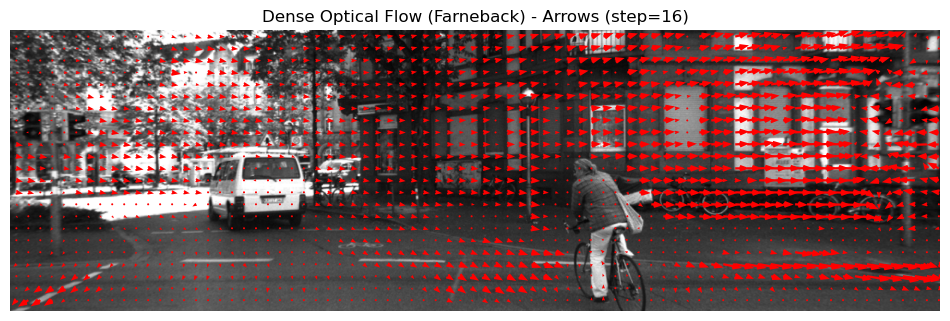

In [16]:
# Block 4: Visualize Motion Vectors as Arrows (Quiver Plot)
print("Block 4: Visualizing motion vectors as arrows...")

# Create grid coordinates for subsampling
y, x = np.mgrid[arrow_step//2:H:arrow_step, arrow_step//2:W:arrow_step]

# Get the flow vectors (u, v) at these grid points
fx = flow[y, x, 0]
fy = flow[y, x, 1]

# Create the Quiver (Arrow) Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Display the first frame as the background
ax.imshow(frame1, cmap='gray')

# Overlay the arrows
ax.quiver(x, y, fx, fy,
          color='red',
          angles='xy',
          scale_units='xy',
          scale=1,
          headwidth=3,
          headlength=4)

ax.set_title(f"Dense Optical Flow (Farneback) - Arrows (step={arrow_step})")
ax.axis('off')

# Save and show the figure
fig.savefig(output_dir / "q1_farneback_arrows.png", bbox_inches='tight')
print(f"Saved arrow visualization to {output_dir.resolve()}")
plt.show()

Block 5: Visualizing flow with HSV for magnitude and direction...
Saved HSV visualization to D:\git\Image and Video Processing\Lab_4\QUESTION1\outputs_q1


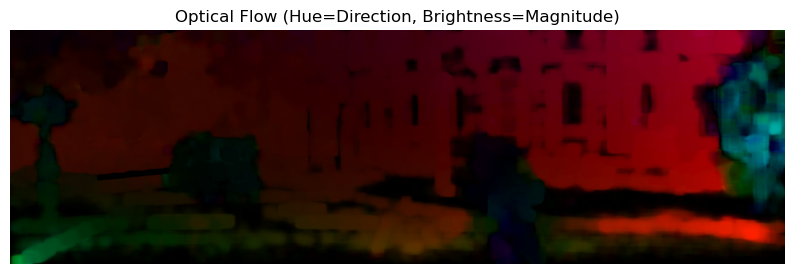

In [17]:
# Block 5: Visualize Flow with HSV
print("Block 5: Visualizing flow with HSV for magnitude and direction...")
# - Hue (Color) = Direction of motion
# - Value (Brightness) = Magnitude (speed) of motion

# Get magnitude (speed) and angle (direction)
mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])

# Set Hue (color) based on angle
hsv = np.zeros((H, W, 3), dtype=np.uint8)
hsv[..., 0] = ang * 180 / np.pi / 2

# Set Saturation to full
hsv[..., 1] = 255

# Set Value (brightness) based on magnitude (normalized)
hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

# Convert HSV to RGB for matplotlib
flow_rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)


# Plot the HSV visualization
fig, ax = plt.subplots(figsize=(10, 8))
imshow(ax, flow_rgb, "Optical Flow (Hue=Direction, Brightness=Magnitude)")

# Save and show the figure
fig.savefig(output_dir / "q1_farneback_hsv.png", bbox_inches='tight')
print(f"Saved HSV visualization to {output_dir.resolve()}")
plt.show()

In [ ]:
# Block 6: Analysis Comments
print("\n--- Block 6: Analysis ---")
print("Q: Comment on differences in motion vectors in fast-moving vs slow-moving regions.")
print("\nAnalysis:")
print("1. Fast-Moving Regions:")
print("   - In the 'Arrow Plot', these regions (like foreground objects, e.g., guard rails, nearby trees) have the LONGEST arrows, indicating large pixel displacement.")
print("   - In the 'HSV Plot', these same regions appear BRIGHTEST (highest 'Value'), as brightness is mapped to motion speed (magnitude).")
print("\n2. Slow-Moving Regions:")
print("   - In the 'Arrow Plot', these regions (like the distant background, sky, or road far ahead) have very short, DOT-LIKE arrows, indicating minimal pixel displacement.")
print("   - In the 'HSV Plot', these regions appear DARK or BLACK, as their motion magnitude is at or near zero.")
print("\nThis effect, where closer objects appear to move faster than distant ones, is known as motion parallax.")